<a href="https://colab.research.google.com/github/Vlad12344/Kaggle-Quick-Draw/blob/master/Confusing_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import re
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.preprocessing import image
from PIL import Image, ImageDraw, ImageOps
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
from keras.optimizers import Adadelta
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras import regularizers
from keras.applications import MobileNet, VGG16
from keras.models import model_from_json
from keras.layers import BatchNormalization

from google.colab import drive
drive.mount('/content/drive/')

# seed для повторяемости результатов
np.random.seed(42)

Using TensorFlow backend.


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
size = 64
PATH = '/content/drive/My Drive/colab'
#PATH = '/content/drive/My Drive/colab/dataset_32x32/lower_75'
#indexes = np.load('/content/drive/My Drive/colab/dataset_32x32/lower_75/index_lower_75.npy')

In [0]:
def to_cat(y, indexes):
  j = 0
  y_test_or_train = np.zeros((len(y), len(indexes)))
  
  for i in y:
    index = np.where(indexes == i)
    y_test_or_train[j, index] = i
    j += 1
    
  return(y_test_or_train)

In [0]:
x_test = np.load(os.path.join(PATH, 'x_test.npy'))
y_test = np.load(os.path.join(PATH, 'y_test.npy'))

x_test = x_test.astype('float16')
x_test /= 255

y_test = np_utils.to_categorical(y_test)

In [0]:
json_file = open(os.path.join(PATH,'quick_doodle_M.json'), "r")
loaded_model_json = json_file.read()
json_file.close()
#Создаем модель на основе загруженных данных
loaded_model = model_from_json(loaded_model_json)
#Загружаем веса в модель
loaded_model.load_weights(os.path.join(PATH,'quick_doodle_M.h5'))

In [0]:
predict = loaded_model.predict(x_test, batch_size=128, verbose=0)

In [0]:
print(np.argmax(predict[1,:]))

194


In [0]:
optim = Adadelta(lr=1.0, rho=0.95, epsilon=1e-08, decay=0.0)
#y = to_cat(y_test, indexes)

loaded_model.compile(optimizer=optim, loss='categorical_crossentropy',
              metrics=['accuracy'])
scores = loaded_model.evaluate(x_test, y_test, verbose=1)

197000/197000 [==============================] - 59s 301us/step


In [0]:
scores

[1.371890412877659, 0.6443248730964467]

In [0]:
top =  np.argsort(-predict)[:,0]

In [0]:
predict_classes = np.zeros((197000), dtype='uint16')
j = 0
for i in top:
  predict_classes[j] = indexes[i]
  j +=1

In [0]:
predict_test_classes = np.zeros((197000), dtype='uint16')
j = 0
for i in y_test:
  predict_test_classes[j] = indexes[i]
  j +=1

In [0]:
print(predict_classes[0:10])

[327  94  65  44 288 147 129 211 133  95]


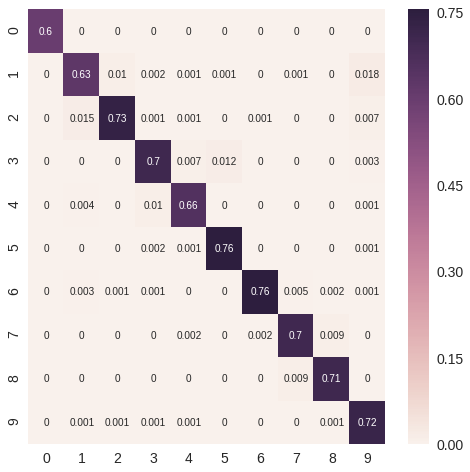

128


In [0]:
y_test = np.load(os.path.join(PATH, 'y_test.npy'))
# Confusion matrix result
diag = np.zeros(197)
  
from sklearn.metrics import classification_report, confusion_matrix
#y_pred = np.argmax(Y_pred, axis=1)
 
#for ix in range(340):
    #print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(predict_test_classes, predict_classes)

cm = cm / 1000
cm[0:8, 0:8]

import seaborn as sn
import pandas as pd

df_cm = pd.DataFrame(cm[0:10,0:10],range(0,10),range(0,10))

plt.figure(figsize = (8,8))
sn.set(font_scale =1.4)
sn.heatmap(df_cm, annot= True, annot_kws ={"size": 10})

plt.show()

for i in range(197):
  diag[i] = cm[i,i]
  
diag = np.where(diag < 0.7)
print(len(diag[0][:]))

In [0]:
df_cm.to_csv(os.path.join(PATH, 'confusion_matrix_197.csv'))

In [0]:
index = np.zeros(197, dtype='uint16')
for i in range(197):
  index[i] = diag[0][i]
np.save(os.path.join(PATH, 'index_lower_75.npy'), index)

**Concatenate 13_million_param_cnn and 197_cnn**